In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ast
import pygraphviz as pgv

In [11]:
data = pd.read_csv("./Movie_Clean.csv", index_col=0)

In [21]:
prod = data[['director', 'production_companies']].copy()

In [117]:
G = nx.Graph()

In [94]:
prod_dict = {}
for idx in prod.index: 
    director = ast.literal_eval(prod.at[idx, 'director'])
    production = ast.literal_eval(prod.at[idx, 'production_companies'])
    if len(director) != 0 and len(production) != 0:
        for n in production: 
            if n in prod_dict.keys():
                new = prod_dict[n]
                if director[0] not in new:
                    new.append(director[0])
                    prod_dict[n] = new
            else:
                prod_dict[n] = director

In [118]:
for key, value in prod_dict.items():
    directors = value
    for n in directors:
        G.add_edge(key, n)

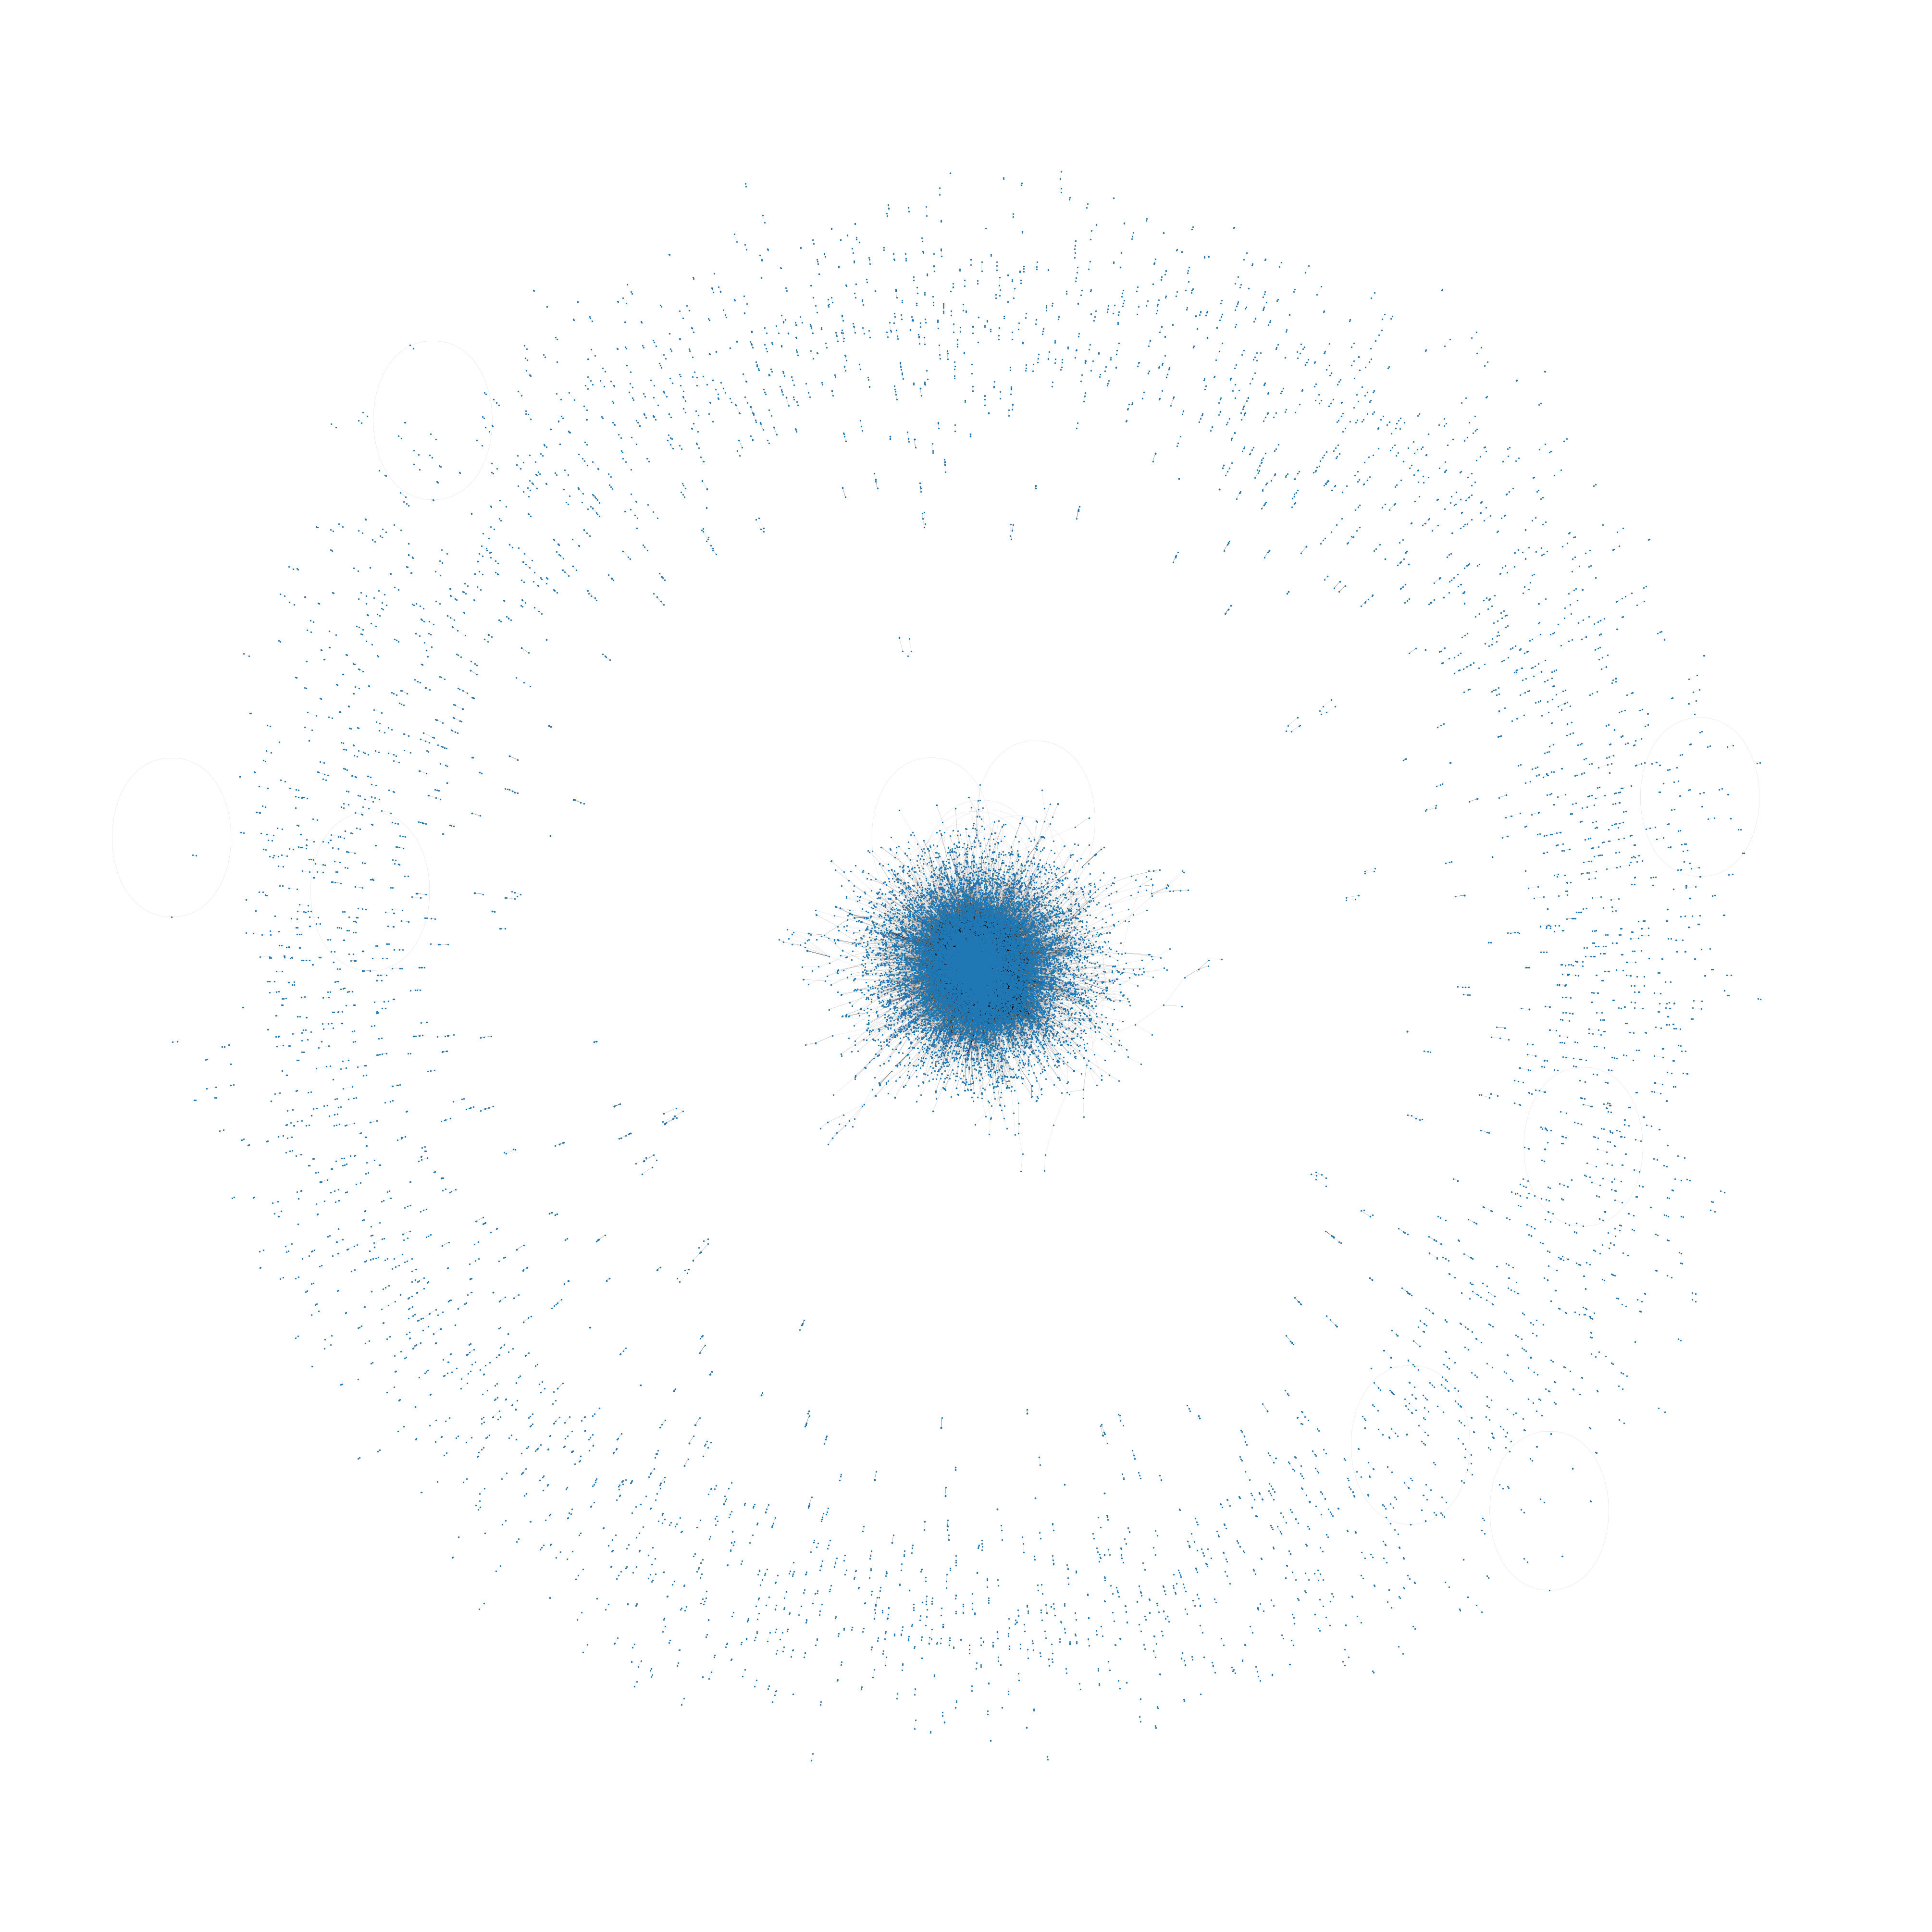

In [122]:
plt.figure(figsize=(40,40))
nx.draw(G, node_size = 2, width = 0.05)
plt.show()

In [ ]:
plt.figure(figsize=(50,50))
pos = nx.spectral_layout(G)
nx.draw(G, node_size = 3, width = 0.05)
plt.show()